1. Wczytaj trzy zarejestrowane sygnały akustyczne, które są w folderze sygnaly_ICA i dodaj je do jednej macierzy. Konieczny będzie zero-padding, bo nie mają takiej samej długości. Padding może być symetryczny, ale nie musi - dobierz go tak jak chcesz.

(Źródło sygnałów: https://data.vision.ee.ethz.ch/cvl/ae_dataset/)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA
from scipy.io.wavfile import read as read_wav
from sklearn.preprocessing import StandardScaler
from scipy.io.wavfile import write as write_wav
from pathlib import Path
import os
from scipy.io.wavfile import read as read_wav
from scipy.signal import spectrogram

16000
(129, 1256)


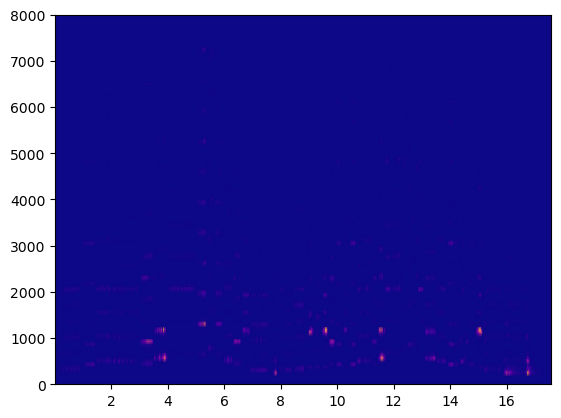

In [27]:
path = '/home/student/Desktop/weronika/lab 4/Zadania i pliki-20231107/sygnaly_ICA'
all_files = Path('/home/student/Desktop/weronika/lab 4/Zadania i pliki-20231107/sygnaly_ICA').glob('*.*')

all_files = os.listdir(path)
files = []
for file in all_files:
    files.append(file)
    
np.save(path, 'pliki', files)

fs, signal = read_wav(path + '/' + 'violin_0.wav')
print(fs)

f, t, Sxx = spectrogram(signal, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud', cmap='plasma')
print(np.shape(Sxx)) #wymiary macierzy spektogramu

spectrograms = []
sig_len = []
for file in all_files:
    fs, signal = read_wav(path + '/' + file)
    _, _, Sxx = spectrogram(signal, fs)
    spectrograms.append(Sxx) #dodajemy spektrogramy do listy - otrzymujemy w ten sposób listę macierzy 2D
    sig_len.append(np.shape(Sxx)[1]) #dodajemy liczbę ramek spektrogramu do listy
    
#padding


2. Dodaj szum gaussowski, tak jak było pokazane w przykładzie zadaniu 2 z lab 3.

In [30]:
S = np.stack((all_files)).T

np.random.seed(0)
S = np.add(signal, 0.2 * np.random.normal(size=S.shape)) #dodajemy szum gaussowski do sygnału
S = StandardScaler().fit_transform(S) #standaryzacja

A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # macierz miksowania (macierz mieszająca)
X = np.dot(S, A) #iloczyn skalarny

ValueError: operands could not be broadcast together with shapes (79067,) (3,) 

3. Zastosuj algorytm ICA do odtworzenia trzech zaszumionych sygnałów składowych. Na początek zastosuj dowolną macierz miksowania.

4. Wyświetl na wykresie:
- sygnał obserwowany (zmiksowane sygnały składowe)
- sygnały oryginalne
- sygnały zrekonstruowane

5. Zapisz zrekonstruowane sygnały do pliku .WAV (np. funkcją write z bilbioteki scipy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html)

6. Odtwórz zapisane pliki .WAV (przy pomocy bilioteki pydub lub w jakimś zewnętrznym programie, np. Audacity). Jeżeli amplitudy są bardzo małe, to trzeba przed zapisaniem do pliku przeskalować je używając kodu poniżej (w razie potrzeby zmieć nazwy zmiennych):

In [ ]:
S1_reconstructed = S_reconstructed[:,0] * (2 ** 15 - 1)/ np.max(np.abs(S_reconstructed[:,0]))
#analogicznie dla pozostałych 2 sygnałów

Uwaga: to jest odpowiedni kod, jeżeli zapisujesz do pliku dane typu int16. Jeżeli zapisujesz dane innego typu, to trzeba ten kod odpowiednio zmodyfikować.

7. Sprawdź, czy odtworzone sygnały brzmią tak samo jak oryginalne. Jeżeli nie, to spróbuj dobrać macierz miksowania tak, by rekonstrukcja była lepsza.

8. Gdy uda się uzyskać satysfakcjonujące wyniki, wyświetl zrekonstruowaną macierz miksowania. Czy jest ona taka sama jak ta, która została użyta do miksowania sygnałów oryginalnych?